In [153]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [154]:
df = pd.read_csv("./../Resource/TMDB_movie_dataset_v11.csv")

In [155]:
df.drop(columns=["poster_path", "backdrop_path", "homepage", "imdb_id"], axis=1)

df = df.drop(df[df["adult"] == True].index)

In [156]:
df.info

<bound method DataFrame.info of               id                  title  vote_average  vote_count    status  \
0          27205              Inception         8.364       34495  Released   
1         157336           Interstellar         8.417       32571  Released   
2            155        The Dark Knight         8.512       30619  Released   
3          19995                 Avatar         7.573       29815  Released   
4          24428           The Avengers         7.710       29166  Released   
...          ...                    ...           ...         ...       ...   
1004660   665885                 Wohimo         0.000           0  Released   
1004661   665890       The Silver Horde         0.000           0  Released   
1004662   665892        Alone With Snow         0.000           0  Released   
1004663   665893  Autopsy of Forgetting         0.000           0  Released   
1004664  1256343               Daydream         0.000           0  Released   

        release_dat

In [157]:
ftmovies = df.sort_values(by="popularity", ascending=False).drop(
    columns=["poster_path", "backdrop_path", "homepage", "imdb_id"], axis=1
)[:10]

ftmovies.reset_index(drop=True, inplace=True)
ftmovies["genres"] = ftmovies["genres"].str.replace(", ", ",")
ftmovies["genres"] = ftmovies["genres"].astype(str).str.split(",")

ftmovies = ftmovies.explode("genres")
ftmovies.value_counts("genres")
ftmovies.head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages
0,565770,Blue Beetle,7.139,1023,Released,2023-08-16,124818235,128,False,120000000,en,Blue Beetle,Recent college grad Jaime Reyes returns home f...,2994.357,Jaime Reyes is a superhero whether he likes it...,Action,"Warner Bros. Pictures, The Safran Company, DC ...",United States of America,"English, Portuguese, Spanish"
0,565770,Blue Beetle,7.139,1023,Released,2023-08-16,124818235,128,False,120000000,en,Blue Beetle,Recent college grad Jaime Reyes returns home f...,2994.357,Jaime Reyes is a superhero whether he likes it...,Science Fiction,"Warner Bros. Pictures, The Safran Company, DC ...",United States of America,"English, Portuguese, Spanish"
0,565770,Blue Beetle,7.139,1023,Released,2023-08-16,124818235,128,False,120000000,en,Blue Beetle,Recent college grad Jaime Reyes returns home f...,2994.357,Jaime Reyes is a superhero whether he likes it...,Adventure,"Warner Bros. Pictures, The Safran Company, DC ...",United States of America,"English, Portuguese, Spanish"
1,980489,Gran Turismo,8.068,702,Released,2023-08-09,114800000,135,False,60000000,en,Gran Turismo,The ultimate wish-fulfillment tale of a teenag...,2680.593,From gamer to racer.,Action,"PlayStation Productions, 2.0 Entertainment, Co...",United States of America,"English, German, Japanese"
1,980489,Gran Turismo,8.068,702,Released,2023-08-09,114800000,135,False,60000000,en,Gran Turismo,The ultimate wish-fulfillment tale of a teenag...,2680.593,From gamer to racer.,Drama,"PlayStation Productions, 2.0 Entertainment, Co...",United States of America,"English, German, Japanese"
1,980489,Gran Turismo,8.068,702,Released,2023-08-09,114800000,135,False,60000000,en,Gran Turismo,The ultimate wish-fulfillment tale of a teenag...,2680.593,From gamer to racer.,Adventure,"PlayStation Productions, 2.0 Entertainment, Co...",United States of America,"English, German, Japanese"
2,968051,The Nun II,6.545,365,Released,2023-09-06,231200000,110,False,38500000,en,The Nun II,"In 1956 France, a priest is violently murdered...",1692.778,Confess your sins.,Horror,"New Line Cinema, Atomic Monster, The Safran Co...",United States of America,"English, French"
2,968051,The Nun II,6.545,365,Released,2023-09-06,231200000,110,False,38500000,en,The Nun II,"In 1956 France, a priest is violently murdered...",1692.778,Confess your sins.,Mystery,"New Line Cinema, Atomic Monster, The Safran Co...",United States of America,"English, French"
2,968051,The Nun II,6.545,365,Released,2023-09-06,231200000,110,False,38500000,en,The Nun II,"In 1956 France, a priest is violently murdered...",1692.778,Confess your sins.,Thriller,"New Line Cinema, Atomic Monster, The Safran Co...",United States of America,"English, French"
3,615656,Meg 2: The Trench,6.912,2034,Released,2023-08-02,384056482,116,False,129000000,en,Meg 2: The Trench,An exploratory dive into the deepest depths of...,1567.273,Back for seconds.,Action,"Apelles Entertainment, Warner Bros. Pictures, ...","China, United States of America",English


In [158]:
ftmovies.reset_index(drop=True, inplace=True)
ftmovies["genres"] = ftmovies["genres"].str.replace(", ", ",")
ftmovies["genres"] = ftmovies["genres"].astype(str).str.split(",")

ftmovies = ftmovies.explode("genres")
ftmovies.value_counts("genres")

genres
Action             6
Thriller           4
Adventure          3
Horror             3
Comedy             2
Crime              2
Drama              2
Fantasy            2
Mystery            2
Science Fiction    2
Animation          1
Family             1
Romance            1
Name: count, dtype: int64

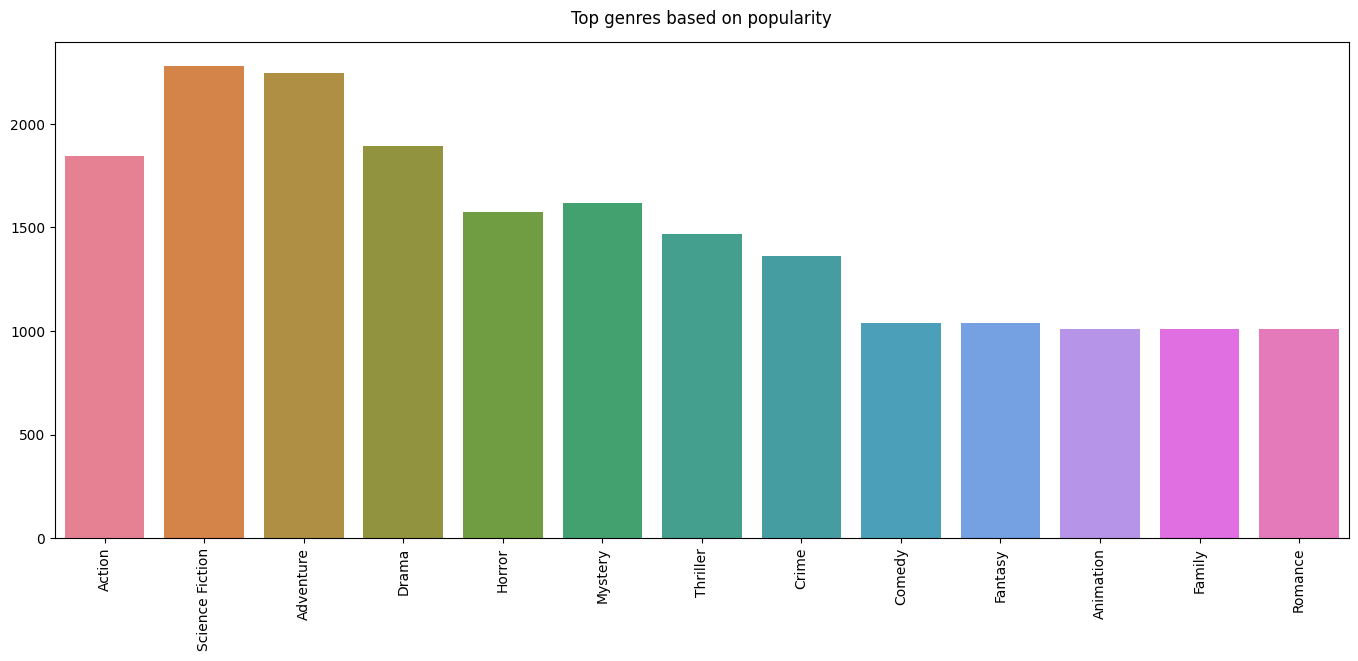

In [165]:
fig1, bar1 = plt.subplots(figsize=(12, 5), sharex=True)

xbar1 = np.array(list(ftmovies["genres"]))
ybar1 = np.array(list(ftmovies["popularity"]))
sns.barplot(
    data=ftmovies,
    x=xbar1,
    y=ybar1,
    hue=xbar1,
    legend=False,
    ax=bar1,
    errorbar=None,
)

bar1.ticklabel_format(style="plain", axis="y")
plt.title("Top genres based on popularity", y=1.02)
plt.xticks(rotation=90)
plt.tight_layout(pad=-5)

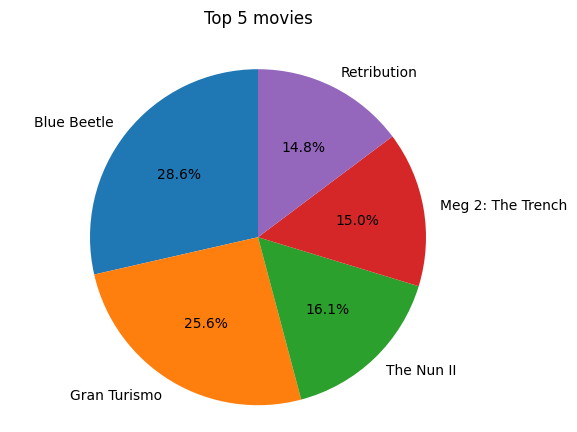

In [160]:
fmovies = df.sort_values(by="popularity", ascending=False)[:5]
fig3, pie = plt.subplots()

pie.pie(
    fmovies["popularity"],
    labels=fmovies["title"],
    autopct="%1.1f%%",
    startangle=90,
)

pie.axis("equal")
plt.title("Top 5 movies\n")
plt.show()

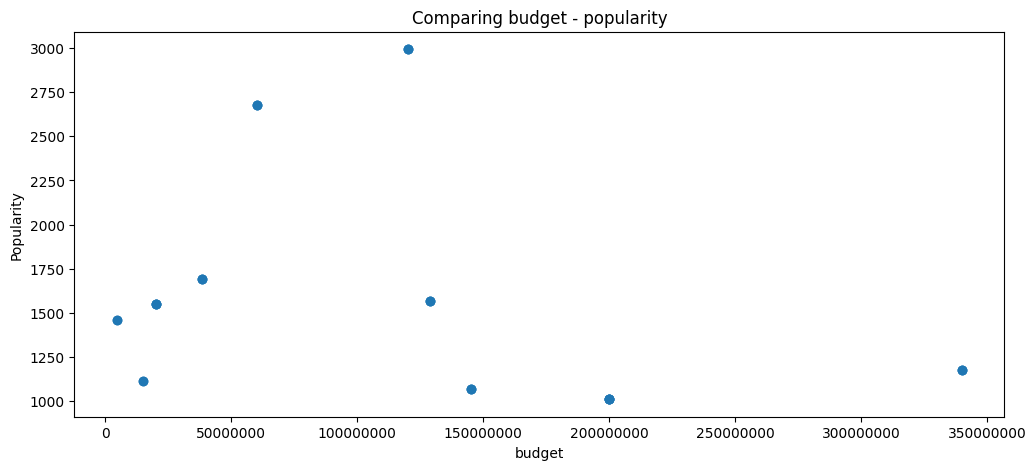

In [161]:
fig3, scatter1 = plt.subplots(figsize=(12, 5), sharex=True)
plt.scatter(ftmovies["budget"], ftmovies["popularity"])
plt.xlabel("budget")
plt.ylabel("Popularity")
plt.title("Comparing budget - popularity")
scatter1.ticklabel_format(style="plain", axis="x")
plt.show()

In [162]:
hm_df = df.sort_values(by="popularity", ascending=False)[
    ["title", "production_companies", "revenue"]
][:10]
hm_df.head()

,title,production_companies,revenue
3869,Blue Beetle,"Warner Bros. Pictures, The Safran Company, DC ...",124818235
5048,Gran Turismo,"PlayStation Productions, 2.0 Entertainment, Co...",114800000
7928,The Nun II,"New Line Cinema, Atomic Monster, The Safran Co...",231200000
2129,Meg 2: The Trench,"Apelles Entertainment, Warner Bros. Pictures, ...",384056482
9949,Retribution,"StudioCanal, The Picture Company, Ombra Films",12905464


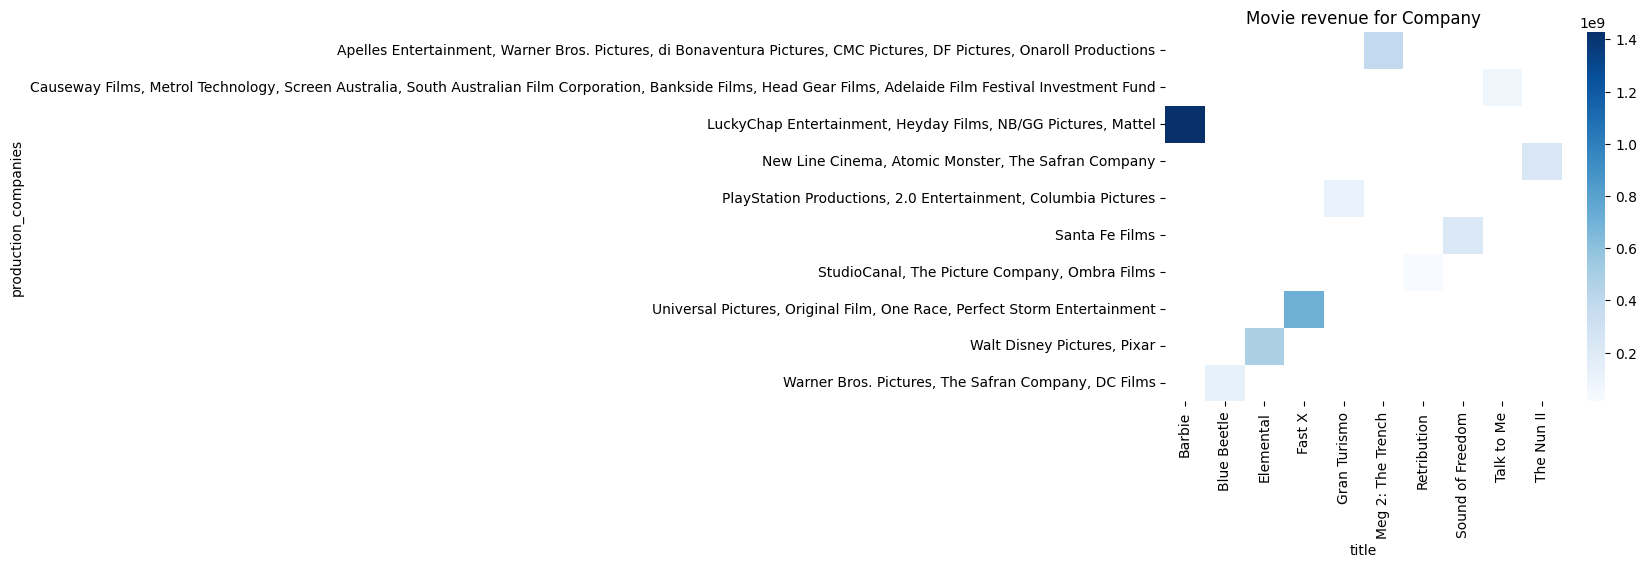

In [163]:
matrix = hm_df.pivot(index="production_companies", columns="title", values="revenue")

sns.heatmap(data=matrix, cmap="Blues", fmt=".0f", annot=False)

plt.title("Movie revenue for Company")

plt.show()